In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import LinearConstraint
from scipy.stats import skew
from scipy.stats import skewtest

In [2]:
# The contraining term written as a function
def f_comp(x,y,a,b,c,d,e,f,g,h):
    
    value=.5*(a*x*y+b*x/y+c*y/x+d/(x*y))+e*x+f/x+g*y+h/y
    return value

In [3]:
# generate distribution of minimizing x and y values for randomly generated coefficients

# initialize empty arrays for x_min and y_min distributions
x_min=np.array([])
y_min=np.array([])


for x in range(2000):
#     generator new random numbers with constraint
    a=random.uniform(0, 10)
    b=random.uniform(0, 10)
    c=random.uniform(0, 10)
    d=random.uniform(0, 10)
    e=random.uniform(0, np.sqrt(a*b))
    f=random.uniform(0, np.sqrt(c*d))
    g=random.uniform(0, np.sqrt(a*c))
    h=random.uniform(0, np.sqrt(b*d))
    
#     Define new function with these random values
    def f_simp(v):
        value=f_comp(v[0],v[1],a,b,c,d,e,f,g,h)
        return value
#     minimize the function of with random values using a guess of x,y=1,1
    min=opt.minimize(f_simp,(1,1),bounds=((.0001,np.inf),(.0001,np.inf)))
# #     record values
    x_min=np.append(x_min,min.x[0])
    y_min=np.append(y_min,min.x[1])
    
    

Text(0.5, 1.0, 'Scatter of x_min,y_min for Random 0<C_{ijkl}<10')

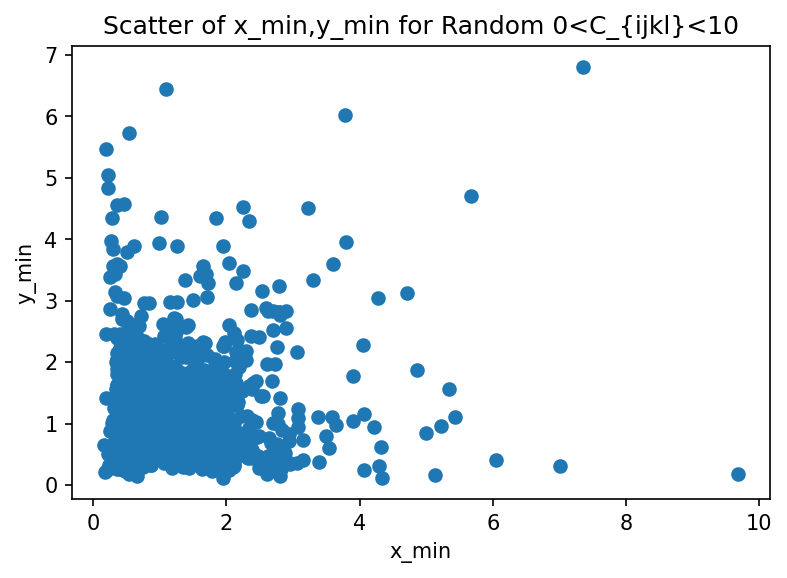

In [4]:
# plot the minimizing (x,y)
plt.rcParams['figure.dpi'] = 150
plt.scatter(x_min,y_min)
plt.xlabel('x_min')
plt.ylabel('y_min')
plt.title('Scatter of x_min,y_min for Random 0<C_{ijkl}<10')


Text(0.5, 1.0, 'Histogram of x_min')

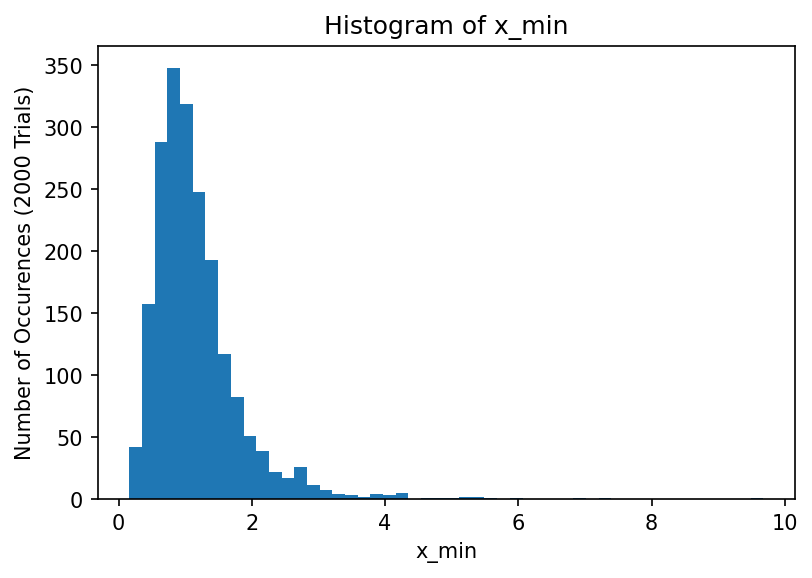

In [5]:
# plot distribution of minimzing x values
plt.rcParams['figure.dpi'] = 150
plt.hist(x_min,bins=50)
plt.xlabel('x_min')
plt.ylabel('Number of Occurences (2000 Trials)')
plt.title('Histogram of x_min')

Text(0.5, 1.0, 'Histogram of y_min')

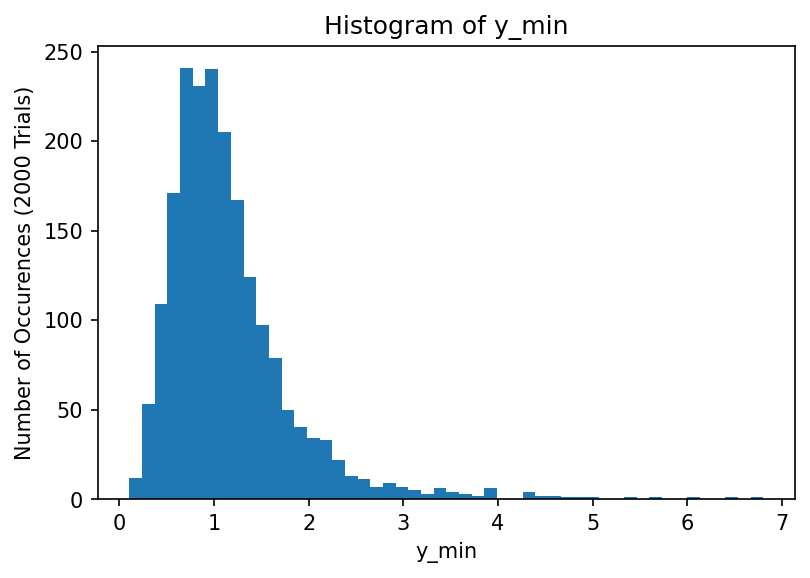

In [6]:
# plot distribution of minimzing y values
plt.rcParams['figure.dpi'] = 150
plt.hist(y_min,bins=50)
plt.xlabel('y_min')
plt.ylabel('Number of Occurences (2000 Trials)')
plt.title('Histogram of y_min')

(array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 3., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]),
 array([0.16086394, 0.25606352, 0.3512631 , 0.44646269, 0.54166227,
        0.63686186, 0.73206144, 0.82726102, 0.92246061, 1.01766019,
        1.11285978, 1.20805936, 1.30325895, 1.39845853, 1.49365811,
        1.5888577 , 1.68405728, 1.77925687, 1.87445645, 1.96965603,
        2.06485562, 2.1600552 , 2.25525479, 2.35045437, 2.44565396,
        2.54085354, 2.63605312, 2.73125271, 2.82645229, 2.92165188,
        3.01685146, 3.11205104, 3.20725063, 3.30245021, 3.3976498 ,
        3.49284938, 3.58804897, 3.68324855, 3.77844813, 3.87364772,
        3.9688473 , 4.06404689, 4.15924647, 4.25444605, 4.34964564,
        4.44484522, 4.54004481, 4.63524439, 4.73044397, 4.82564356,
        4.92084314, 5.01604273, 5.11124231, 5.2064419 , 5.30164148,
   

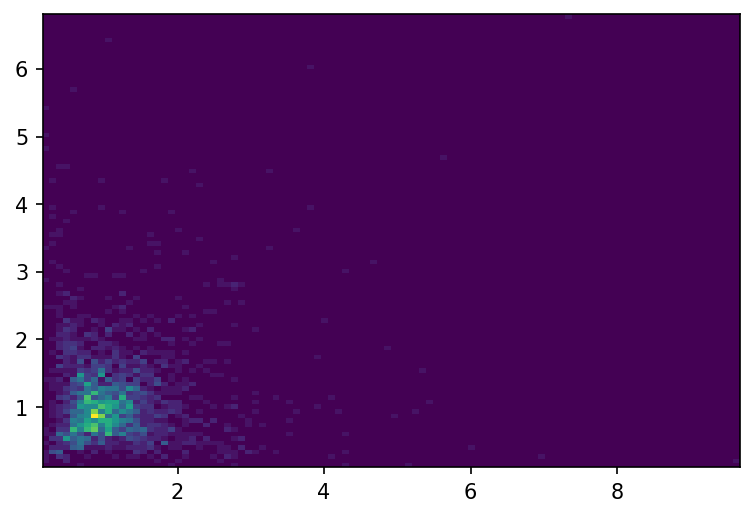

In [7]:
# make a heat map of the minimzing (x,y)
plt.hist2d(x_min,y_min,bins=100)

In [8]:
# get arrays of (x,y) values where both are under 4
n=0
x_small=np.array([])
y_small=np.array([])
for n in range(0,len(x_min)):
    if x_min[n]<4 and y_min[n]<4:
        x_small=np.append(x_small,x_min[n])
        y_small=np.append(y_small,y_min[n])
        


Text(0.5, 1.0, 'Heat Map of x_min,y_min<4')

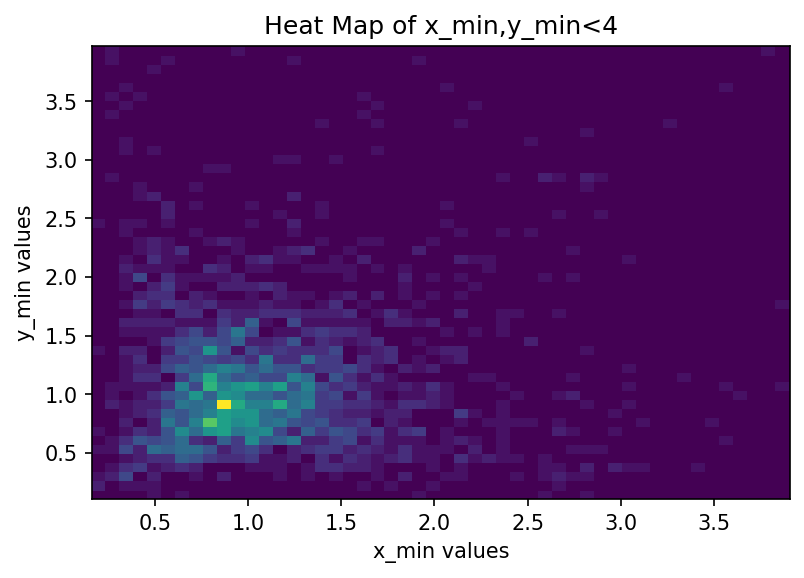

In [9]:
# create heat map of values of (x,y) less than 4
plt.hist2d(x_small,y_small,bins=50)
plt.xlabel('x_min values')
plt.ylabel('y_min values')
plt.title('Heat Map of x_min,y_min<4')

In [10]:
# check the skewness and mean of (x,y) for different upper bounds to check

# initialize empty arrays to record screwness and mean values
x_skew=np.array([])
x_mean=np.array([])
y_skew=np.array([])
y_mean=np.array([])
upper_bound=np.array([])
for n in range (1,21):
#     initialize empty arrays for the minimum values
    x_min=np.array([])
    y_min=np.array([])


    for x in range(2000):
#     generator new random numbers with constraint
        a=random.uniform(0, n)
        b=random.uniform(0, n)
        c=random.uniform(0, n)
        d=random.uniform(0, n)
        e=random.uniform(0, np.sqrt(a*b))
        f=random.uniform(0, np.sqrt(c*d))
        g=random.uniform(0, np.sqrt(a*c))
        h=random.uniform(0, np.sqrt(b*d))
    
#     Define new function with these random values
        def f_simp(v):
            value=f_comp(v[0],v[1],a,b,c,d,e,f,g,h)
            return value
#     minimize the function of with random values using a guess of x,y=1,1
        min=opt.minimize(f_simp,(1,1),bounds=((.0001,np.inf),(.0001,np.inf)))
# #     record values of the minimums
        x_min=np.append(x_min,min.x[0])
        y_min=np.append(y_min,min.x[1])
#     recorded the skewness and mean of the x_min and y_min distributions for different n, along with recording n
    x_skew=np.append(x_skew,skew(x_min))
    x_mean=np.append(x_mean,np.mean(x_min))
    y_skew=np.append(y_skew,skew(y_min))
    y_mean=np.append(y_mean,np.mean(y_min))
    upper_bound=np.append(upper_bound,n)

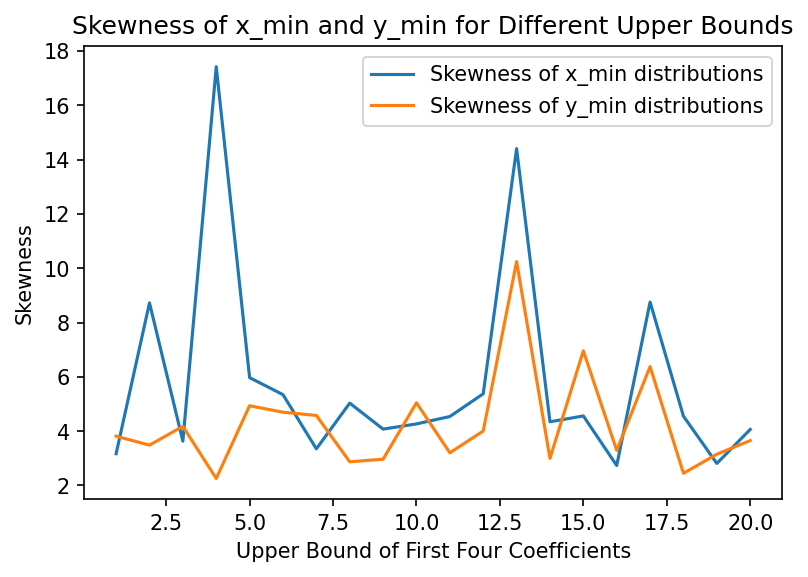

In [11]:
# plot the skewness of the x_min and y_min distributions for each upper bound
plt.plot(upper_bound,x_skew,label='Skewness of x_min distributions')
plt.plot(upper_bound,y_skew,label='Skewness of y_min distributions')
plt.xlabel('Upper Bound of First Four Coefficients')
plt.ylabel('Skewness')
plt.title('Skewness of x_min and y_min for Different Upper Bounds')
plt.legend()

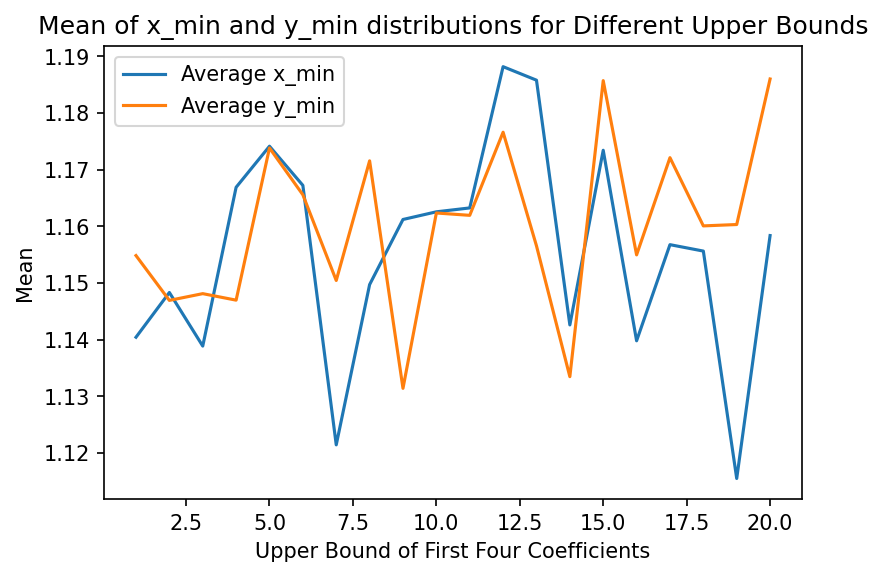

In [12]:
# plot the mean of the x_min and y_min distributions for each upper bound
plt.plot(upper_bound,x_mean,label='Average x_min')
plt.plot(upper_bound,y_mean,label='Average y_min')
plt.xlabel('Upper Bound of First Four Coefficients')
plt.ylabel('Mean')
plt.title('Mean of x_min and y_min distributions for Different Upper Bounds')
plt.legend()